### Q-4. 
Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm


In [1]:
## Import the necessary libraries:-
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv('online_shoppers_intention.csv')


In [3]:
# Check top 5 Rows
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
## Checking All Rows & Columns Available in Dataset 
data.shape

(12330, 18)

In [5]:
## Checking Information Related with Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
# Convert target variable to categorical
data['Revenue'] = data['Revenue'].astype(str)

In [8]:
# Extract the relevant features for revenue prediction
features = data.drop(['Revenue'], axis=1)

In [9]:
# Convert weekend column to numerical values (0 for False, 1 for True)
features['Weekend'] = features['Weekend'].astype(int)

In [10]:
# Convert informational duration column to numerical values (0 for False, 1 for True)
features['Informational_Duration'] = features['Informational_Duration'].apply(lambda x: 1 if x > 0 else 0)

In [32]:
data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767


In [11]:
# Encode categorical features using one-hot encoding
features = pd.get_dummies(features)

In [12]:
# Extract the target variable (Revenue)
target = data['Revenue']


In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Random Forest Classifier

In [14]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [15]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Predict the revenue on the test set
y_pred = rf_classifier.predict(X_test)

In [17]:
# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [18]:
# Print the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.8961881589618816
Confusion Matrix:
[[1985   70]
 [ 186  225]]


array([[1985,   70],
       [ 186,  225]], dtype=int64)

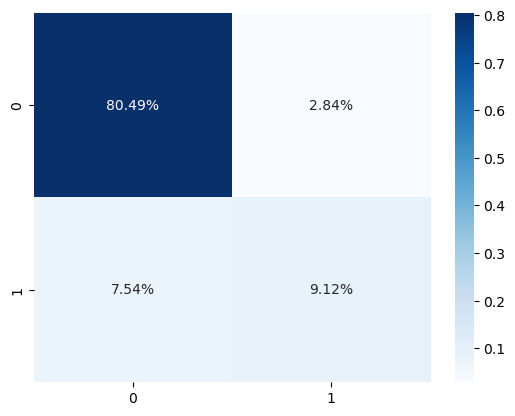

In [19]:

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm/np.sum(cm), annot=True,cmap="Blues", fmt='.2%')
cm

### Bagged Decision Tree

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

# kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()

num_trees = 7

In [21]:
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees,random_state=2)
model.fit(X_train,y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=7,
                  random_state=2)

In [22]:

y_predict=model.predict(X_test)
y_predict

array(['False', 'False', 'True', ..., 'False', 'True', 'False'],
      dtype=object)

In [23]:

acs=accuracy_score(y_test,y_predict) #test accuracy
acs

0.8848337388483374

array([[1941,  114],
       [ 170,  241]], dtype=int64)

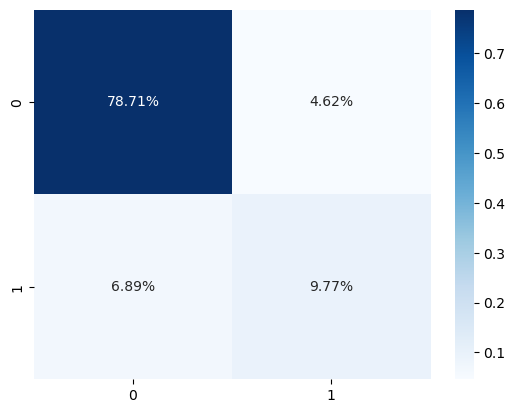

In [24]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True,cmap="Blues", fmt='.2%')
cm

### Voting Classifier

In [25]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [26]:
# create the sub models
estimators = []
model1 = LogisticRegression(random_state=2)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier(random_state=2)
estimators.append(('cart', model2))
model3 = SVC(random_state=2)
estimators.append(('svm', model3))
     

In [27]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('logistic', LogisticRegression(random_state=2)),
                             ('cart', DecisionTreeClassifier(random_state=2)),
                             ('svm', SVC(random_state=2))])

In [28]:
y_predict=ensemble.predict(X_test)
y_predict

array(['False', 'False', 'False', ..., 'False', 'False', 'False'],
      dtype=object)

In [29]:
acs1=accuracy_score(y_test,y_predict)#test ACcuracy
acs1

0.8661800486618005

array([[2021,   34],
       [ 296,  115]], dtype=int64)

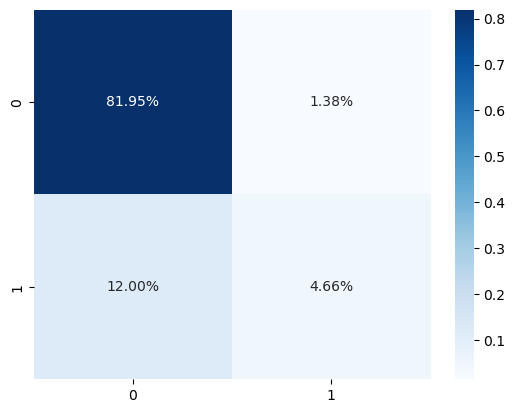

In [30]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True,cmap="Blues", fmt='.2%')
cm
     

### Here we done modelling using 3 ensemble techniques Random Forest, Bagged Decision Tree, Voting('logistic','cart','svc') among all Random forest performin well with accuracy aroung 89.6%